## **CONEJOS VS OVEJAS**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.integrate import odeint
import cmath

<function matplotlib.pyplot.show(close=None, block=None)>

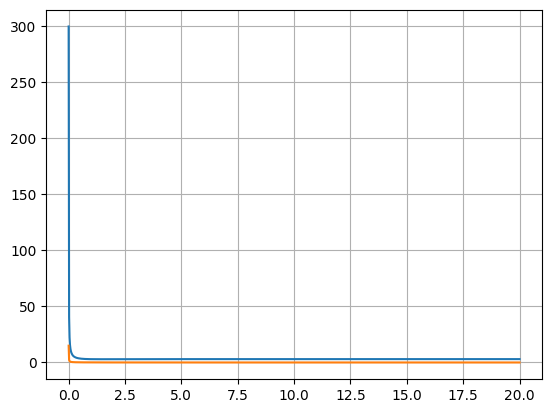

In [ ]:
#x(t) es la población de conejos
#y(t) es la población de ovejas

co = 3 #Capacidad de carga de los conejos
ov = 2 #Capacidad de carga de las ovejas

def derivadas_conejos_ovejas(X, t, co, ov):
    x, y = X
    #Ambas son ecuaciones "logísticas"
    dotx = x*(co-x) - 2*x*y
    doty = y*(ov-y) - x*y
    return np.array([dotx, doty])

Nt = 1000 #Numero de divisiones del intervalo
tmax = 20
t = np.linspace(0, tmax, Nt)
X0 = [300, 15] #Establecemos condición inicial

# Integración de las ecuaciones
res_no_equilibrio = integrate.odeint(derivadas_conejos_ovejas, X0, t,args=(co, ov))
x_ne, y_ne = res_no_equilibrio.T  # Obtener las soluciones de x y y

plt.plot(t, x_ne)
plt.plot(t, y_ne)
plt.grid()
plt.show

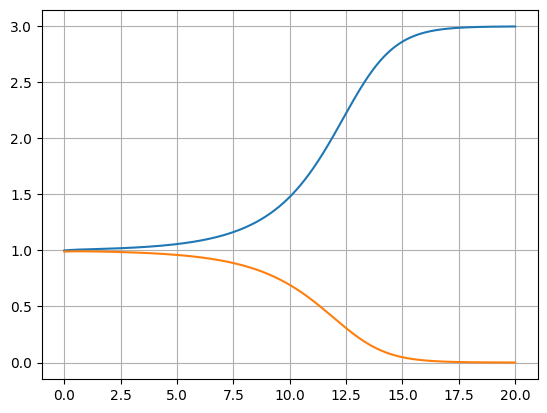

In [ ]:
Nt = 1000
tmax = 20
t = np.linspace(0, tmax, Nt)

X1 = [1,0.99] #OBSERVEMOS QUE 1,1 NO ES ESTABLE
res_equilibrio = integrate.odeint(derivadas_conejos_ovejas, X1, t, args=(co, ov))
x_e, y_e = res_equilibrio.T

plt.plot(t, x_e)
plt.plot(t, y_e)
plt.grid()
plt.show()

Podemos observar que este modelo, y analizando la estabilidad de cada uno de los puntos de equilibrio, alguna de las poblaciones se termina extinguiendo porque las peleas entre especies vuelven imposible la supervivencia de ambas a la vez, ya que los únicos puntos estables son con alguna de las poblaciones igual a cero.

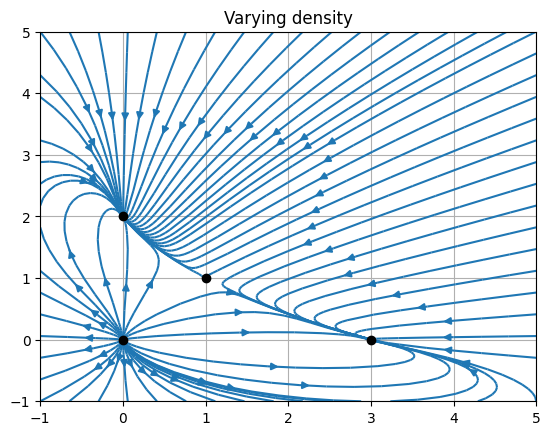

In [ ]:
#Diagrama de fases
w_1 = -1
w_2 = 5
Y, X = np.mgrid[w_1:w_2:100j,w_1:w_2:100j]

U, V = derivadas_conejos_ovejas([X,Y], t, co, ov)

plt.streamplot(X, Y, U, V, density=[0.6,0.6], broken_streamlines=False)
plt.plot([0, 3, 0, 1],[0, 0, 2, 1], marker = 'o', markersize=6, linestyle='', color='k')
#En este sistema el único punto de equilibrio es (0,0) porque el resto de la solución no tiene raíz
plt.title("Varying density")
plt.grid()
plt.show()

Podemos observar que (1,1) es un punto silla, entonces a la más mínima perturbación de él: o se extinguen las ovejas en el (3, 0) o se extinguen los conejos en el (0,2).

# OSCILADOR DE DUFFING (SISTEMA CONSERVATIVO NO LINEAL). DOBLE POZO POTENCIAL

  X'' = X - X^3

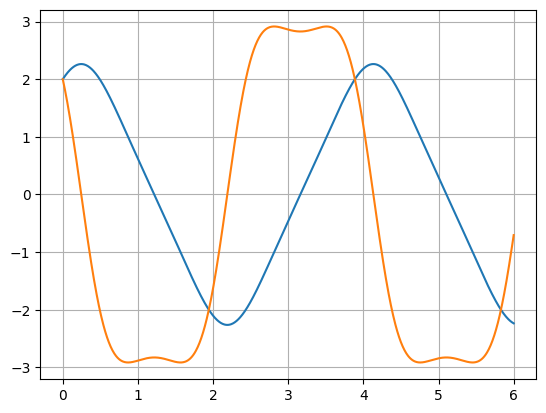

In [ ]:
#Planteamos el sistema lineal:

def oscilador_duffing(X, t):
  x,y = X
  dotx = y
  doty = x- x**3
  return([dotx, doty])

Nt = 1000
tmax = 6
t = np.linspace(0, tmax, Nt)

X2 = [2, 2]
res_osc1 = integrate.odeint(oscilador_duffing, X2, t)
x_osc1, y_osc1 = res_osc1.T

plt.plot(t,x_osc1)
plt.plot(t, y_osc1)
plt.grid()
plt.show()

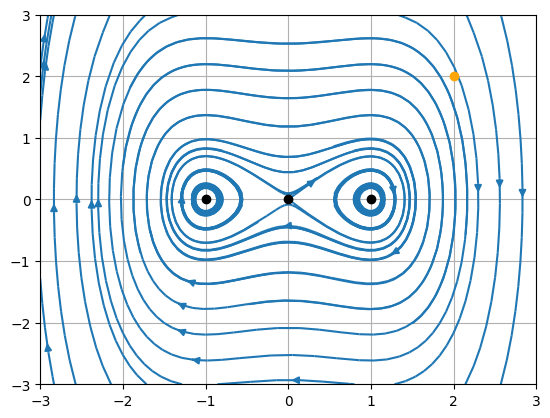

In [ ]:
w_i = -3
w_f = 3
Y, X = np.mgrid[w_i:w_f:100j,w_i:w_f:100j]

U, V = oscilador_duffing([X, Y], t)

plt.streamplot(X, Y, U, V, density=[0.5, 0.5], broken_streamlines= False)
plt.plot([0, 1, -1],[0, 0, 0], marker = 'o', markersize=6, linestyle='', color='k')
plt.plot([2], [2], marker = 'o', markersize=6, linestyle='', color='orange') #Punto inicial que elegí
plt.grid()
plt.show()

Las órbitas que obtuvimos se denominan homoclínicas en donde las flechas que salen de uno de los puntos de equilibrio rodean a otros, en este caso los centros (ptos de equilibrio con Re(lambda) = 0). También existen las órbitas heteroclínicas que transportan todo lo que va de un punto de equilibrio a otro.

# **EXCITABILIDAD NEURONAL**
Fitzhugh-Nagumo

v = voltaje a través de la neurona 1

w = voltaje a través de la neurona 2

I = corriente del estímulo externo

épsilon,beta,gamma


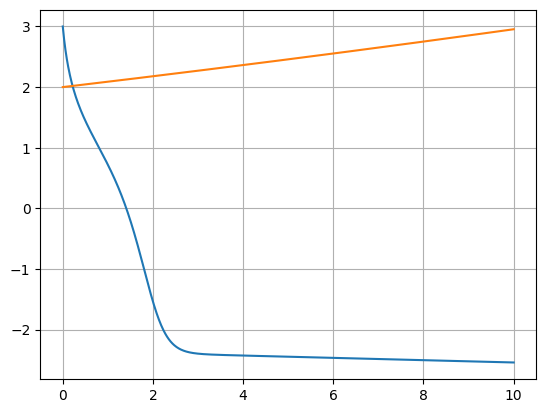

In [ ]:
epsilon = 0.08
beta = -0.8
gamma = 0.7
I = 0

def excitabilidad_neuronal(X, t_excit, epsilon, beta, gamma, I):
  v,w = X
  dotv = v - (v**3)/3 - w + I
  dotw = epsilon*(w + beta*w + gamma)
  return([dotv, dotw])

Nt = 1000
tmax = 10
t_excit = np.linspace(0,tmax, Nt)

X_excit = [3,2]

res_excit = integrate.odeint(excitabilidad_neuronal, X_excit, t_excit, args=(epsilon, beta, gamma, I))
v_excit, w_excit = res_excit.T

plt.plot(t_excit, v_excit)
plt.plot(t_excit, w_excit)
plt.grid()
plt.show()

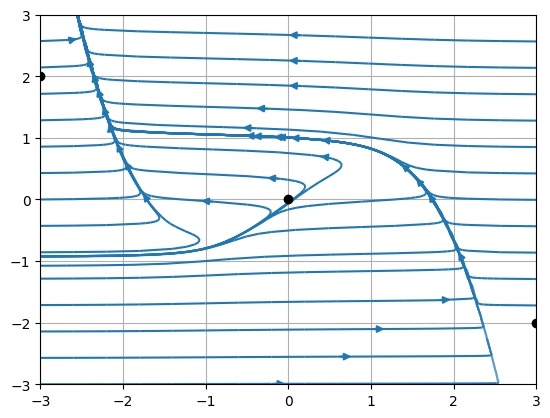

In [ ]:
excit_i = -3
excit_f = 3
W, V = np.mgrid[excit_i:excit_f:100j,excit_i:excit_f:100j]

X, Y = excitabilidad_neuronal([V, W], t_excit, epsilon, beta, gamma, I )

plt.streamplot(V, W, X, Y, density=[0.5, 0.5], broken_streamlines= False)
plt.plot([-3, 0, 3], [2, 0, -2], marker = 'o', markersize=6, linestyle='', color='k')
plt.grid()
plt.show()


Conclusión: de este modelo no entendí nada. Tampoco está en los libros. Si alguno lo quiere chusmear buenísimo.

# EJERCICIO 9 TEÓRICO

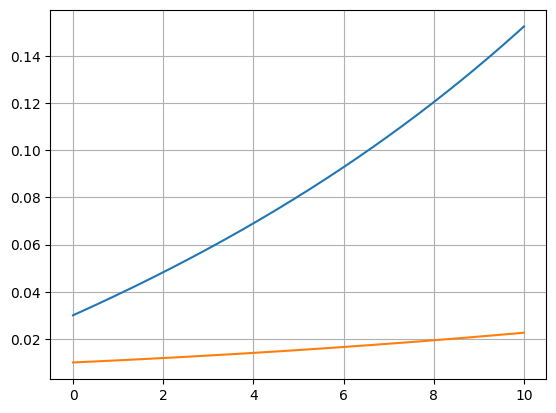

In [ ]:
a = 0.05
b = 0.1
c = 0.04
def poblacion(X, t, a, b, c):
  p, q = X
  dotp = q - p*(a - b*p)
  dotq = q*(c + (a-b*p))
  return([dotp, dotq])
Nt = 1000
tmax = 10
t_p = np.linspace(0,tmax, Nt)
X_p = [0.03, 0.01]
res_p = integrate.odeint(poblacion, X_p, t_p, args=(a, b, c))
p, q = res_p.T
plt.plot(t_p, p)
plt.plot(t_p, q)
plt.grid()
plt.show()

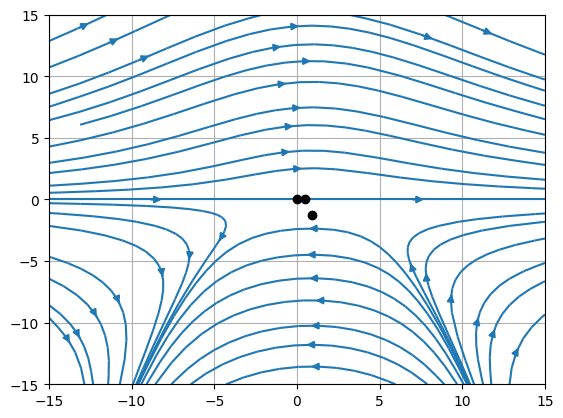

In [ ]:
pob_i = -15
pob_f = 15
W, V = np.mgrid[pob_i:pob_f:100j,pob_i:pob_f:100j]
X, Y = poblacion([V, W], t_p, a, b, c)
plt.streamplot(V, W, X, Y, density=[0.5, 0.5], broken_streamlines= False)
plt.plot([0, a/b, (a+c)/b], [0, 0, -(a+2*c)/b], marker = 'o', markersize=6, linestyle='', color='k')
plt.grid()
plt.show()

# EJERCICIO 10

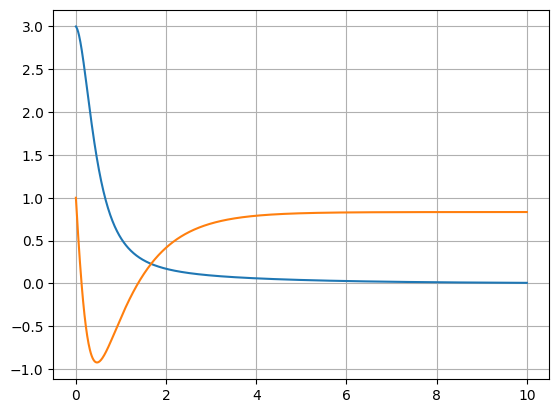

In [ ]:
a = 1.2
b = 1.2
def molino(X, t, a, b):
    p, v = X
    dotp = -a*p + p*v
    dotv = 1 - b*v - p**2
    return [dotp, dotv]

Nt = 1000
tmax = 10
t_m = np.linspace(0, tmax, Nt)
X_m = [3, 1]

res_m = integrate.odeint(molino, X_m, t_m, args=(a, b), rtol= 1e-10, atol = 1e-10)
p, v = res_m.T

plt.plot(t_m, p)
plt.plot(t_m, v)
plt.grid()
plt.show()


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


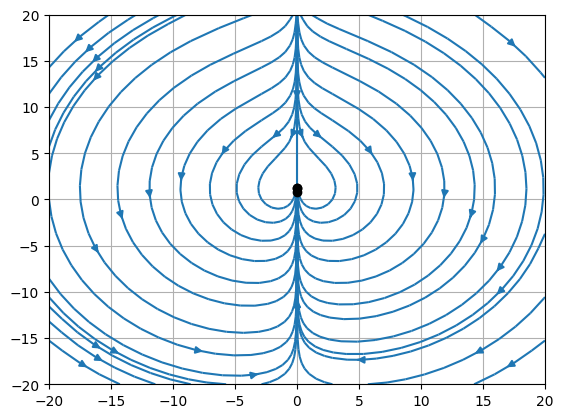

In [ ]:
mol_i = -20
mol_f = 20
W, V = np.mgrid[mol_i:mol_f:100j,mol_i:mol_f:100j]
X, Y = molino([V, W], t_m, a, b)
plt.streamplot(V, W, X, Y, density=[0.5, 0.5], broken_streamlines= False)
p1 = cmath.sqrt((-b)*a + 1)
p2 = (-1) * cmath.sqrt((-b)*a + 1)
plt.plot([p1, p2, 0], [a, a, 1/b], marker = 'o', markersize=6, linestyle='', color='k')
plt.grid()
plt.show()

Chequeo cositas

In [ ]:
DF_x1 = np.array ([[0,  -2*(cmath.sqrt(-b * a +1))], [-(cmath.sqrt(-b * a +1)),  -b]])

x, v = np.linalg.eig (DF_x1)
print ("Eigenvalue: ", x)
print ("Eigenvectors: ", v)

Eigenvalue:  [-0.6+0.72111026j -0.6-0.72111026j]
Eigenvectors:  [[ 0.81649658+0.j          0.81649658+0.j        ]
 [-0.44381268-0.36927447j  0.44381268-0.36927447j]]


In [ ]:
DF_x3 = np.array ([[-a + 1/b,  0], [0,  -b]])

x, v = np.linalg.eig (DF_x3)
print ("Eigenvalue: ", x)
print ("Eigenvectors: ", v)

Eigenvalue:  [-0.36666667 -1.2       ]
Eigenvectors:  [[1. 0.]
 [0. 1.]]


# Ejercicio 11

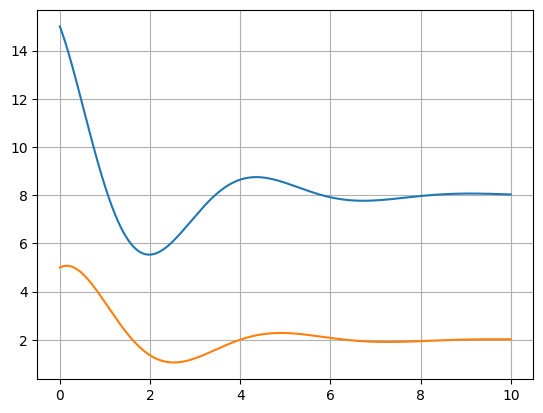

In [ ]:
Go = 4
c = 2
k = 4
def gobierno(X, t, c, k, Go):
    I, S = X
    dotI = I - k*S
    dotS = I- c*S - Go
    return [dotI, dotS]

Nt = 1000
tmax = 10
t_go = np.linspace(0, tmax, Nt)
X_go = [15, 5]

res_go = integrate.odeint(gobierno, X_go, t_go, args=(c, k, Go), rtol= 1e-10, atol = 1e-10)
x, y = res_go.T

plt.plot(t_go, x)
plt.plot(t_go, y)
plt.grid()
plt.show()


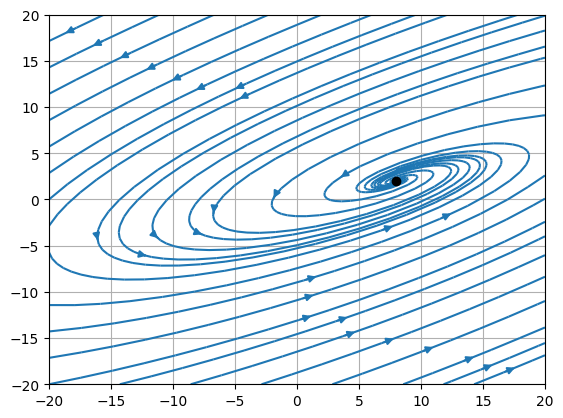

In [ ]:
go_i = -20
go_f = 20
W, V = np.mgrid[go_i:go_f:100j,go_i:go_f:100j]
X, Y = gobierno([V, W], t_go, c, k, Go)
plt.streamplot(V, W, X, Y, density=[0.5, 0.5], broken_streamlines= False)
plt.plot([k * Go/(k-2) ], [Go/(k-2) ], marker = 'o', markersize=6, linestyle='', color='k')
plt.grid()
plt.show()

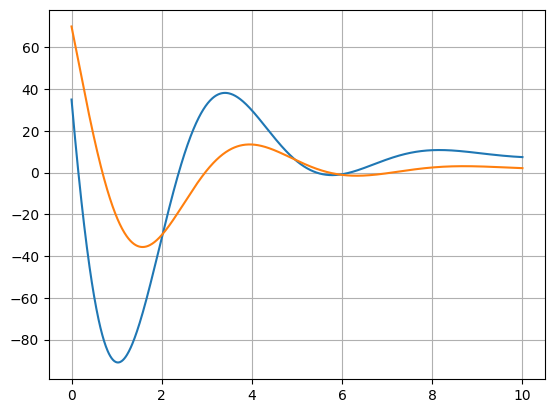

In [ ]:
#Probamos con otras condiciones iniciales
X_go2 = [35, 70]

res_go2 = integrate.odeint(gobierno, X_go2, t_go, args=(c, k, Go), rtol= 1e-10, atol = 1e-10)
x2, y2 = res_go2.T

plt.plot(t_go, x2)
plt.plot(t_go, y2)
plt.grid()
plt.show()

Como el foco es asintóticamente estable, no importa las condiciones iniciales con las que empecemos, la cantidad de ingresos y la tasa de gastos se van a estabilizar en un ratio de 4:1. Es decir, cada 4 pesos que ingresan, el equilibrio se da cuando se gasta 1 y el sistema se mantiene igual para siempre.

#Ejercicio 13

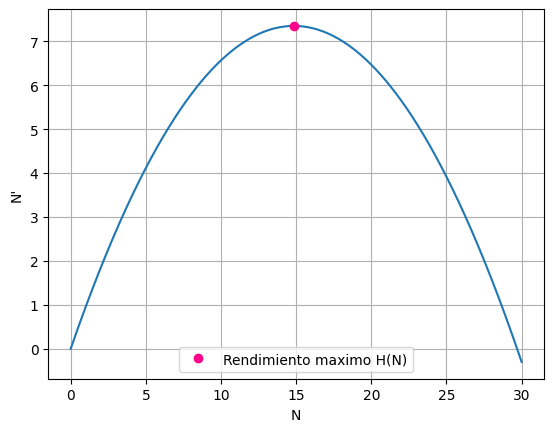

In [ ]:
r = 1
c = 0.01
k = 30

def derivada_cosecha(N, t, r, c, k):
    return r * N * (1 - N / k) - N * c

N_vals = np.linspace(0, k, 1000)  # Valores de N desde 0 hasta k
N_derivadas = derivada_cosecha(N_vals, t, r, c, k)

N_maximo = (r - c) / (2 * r / k)
N_prima_maximo = derivada_cosecha(N_maximo, t, r, c, k)

plt.plot(N_vals, N_derivadas)
plt.plot([N_maximo], [N_prima_maximo], marker = 'o', markersize=6, linestyle='', color='#fc038c', label = "Rendimiento maximo H(N)")
plt.legend()
plt.xlabel('N')
plt.ylabel("N'")
plt.grid()
plt.show()

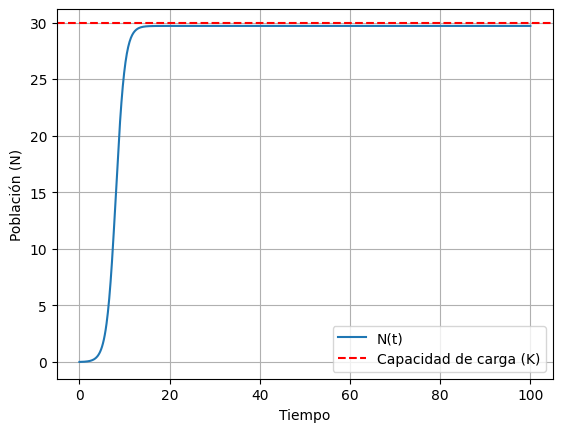

In [ ]:
N0 = 0.01  # Condición inicial para N
tmax = 100  # Tiempo máximo de integración
t_vals = np.linspace(0, tmax, 1000)  # Valores de tiempo

# Resolver la ecuación diferencial
N_sol = odeint(derivada_cosecha, N0, t_vals, args=(r, c, k))

# Graficar la solución
plt.plot(t_vals, N_sol, label="N(t)")
plt.axhline(y=k, color='r', linestyle='--', label="Capacidad de carga (K)")
plt.xlabel('Tiempo')
plt.ylabel('Población (N)')
plt.legend()
plt.grid()
plt.show()

# 13 b

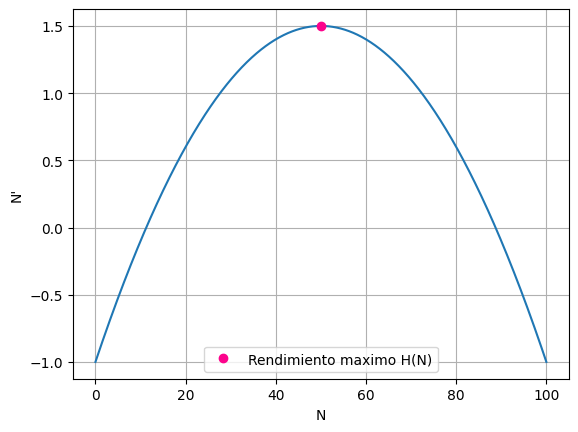

In [ ]:
r = 0.1
k = 100
H0 = 1

def derivada_cosecha(N, t, r, k, H0):
    return r * N * (1 - N / k) - H0

N_vals = np.linspace(0, k, 1000)  # Valores de N desde 0 hasta k
N_derivadas = derivada_cosecha(N_vals, t, r, k, H0)

N_maximo = k/2
N_prima_maximo = derivada_cosecha(N_maximo, t, r, k, H0)

plt.plot(N_vals, N_derivadas)
plt.plot([N_maximo], [N_prima_maximo], marker = 'o', markersize=6, linestyle='', color='#fc038c', label = "Rendimiento maximo H(N)")
plt.legend()
plt.xlabel('N')
plt.ylabel("N'")
plt.grid()
plt.show()

**Contour plot**

# Ejercicio 14

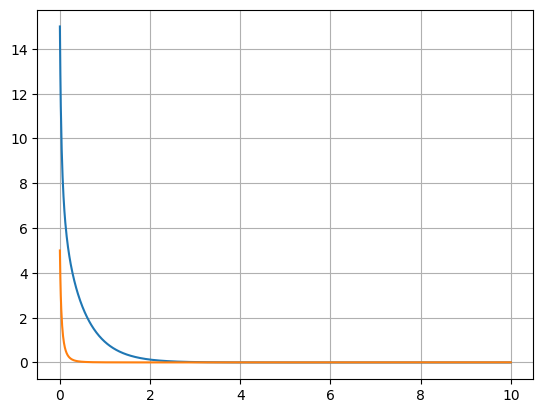

In [ ]:
C = 2
r1 = 0.05
r2 = 0.1
k1 = 30
k2 = 20
lam1 = 3
lam2 = 2

def peces(X, t, C, r1, r2, k1, k2, lam1, lam2):
    N1, N2 = X
    dotN1 = r1*N1*(1 - N1/k1) - lam1 * N1 * N2 - C * N1
    dotN2 = r2*N2*(1 - N2/k2) - lam2* N1 * N2
    return [dotN1, dotN2]

Nt = 1000
tmax = 10
t_peces = np.linspace(0, tmax, Nt)
X_peces = [15, 5]

res_peces = integrate.odeint(peces, X_peces, t_peces, args=(C, r1, r2, k1, k2, lam1, lam2))
N1, N2 = res_peces.T

plt.plot(t_peces, N1)
plt.plot(t_peces, N2)
plt.grid()
plt.show()

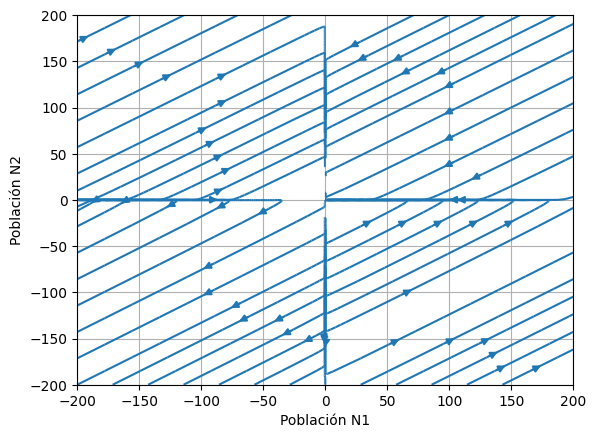

In [ ]:
peces_i = -200
peces_f = 200
W, V = np.mgrid[peces_i:peces_f:100j, peces_i:peces_f:100j]
X, Y = peces([V, W], t_peces, C, r1, r2, k1, k2, lam1, lam2)
plt.streamplot(V, W, X, Y, density=[0.5, 0.5], broken_streamlines=False)
plt.xlabel('Población N1')
plt.ylabel('Población N2')
plt.grid()
plt.show()

# Sustancias químicas

**Análisis de la concentración de A y B con respecto al tiempo**

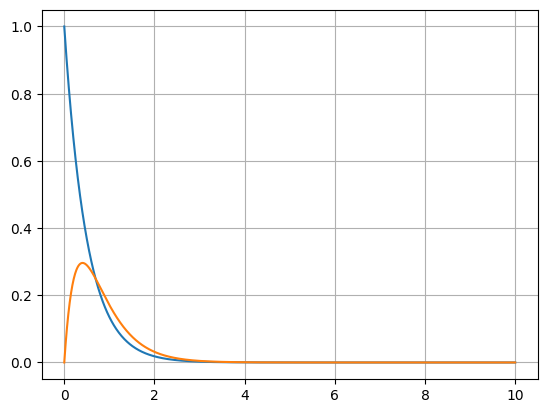

In [ ]:
k1 = 2
k2 = 3

def sustancias_quimicas(X, t, k1, k2):
    A, B = X
    dotA = -k1 * A
    dotB = k1 * A - k2 * B
    return [dotA, dotB]

Nt = 1000
tmax = 10
t_qui = np.linspace(0, tmax, Nt)
X_qui = [1, 0]

res_qui = integrate.odeint(sustancias_quimicas, X_qui, t_qui, args=(k1, k2))
A, B = res_qui.T

plt.plot(t_qui, A)
plt.plot(t_qui, B)
plt.grid()
plt.show()

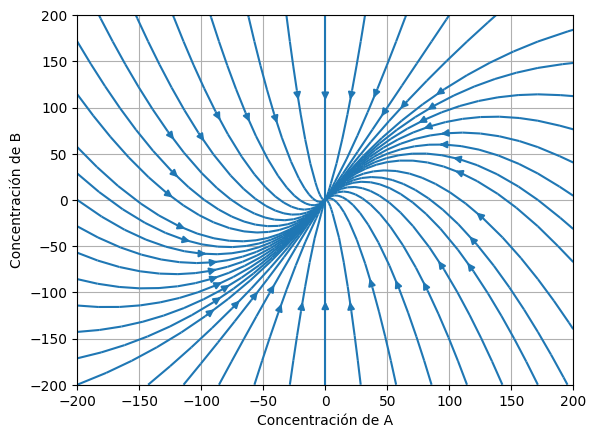

In [ ]:
qui_i = -200
qui_f = 200
W, V = np.mgrid[qui_i:qui_f:100j, qui_i:qui_f:100j]
X, Y = sustancias_quimicas([V, W], t, k1, k2)
plt.streamplot(V, W, X, Y, density=[0.5, 0.5], broken_streamlines=False)
plt.xlabel('Concentración de A')
plt.ylabel('Concentración de B')
plt.grid()
plt.show()

**Análisis de la cantidad de cada sustancia que reacciona**

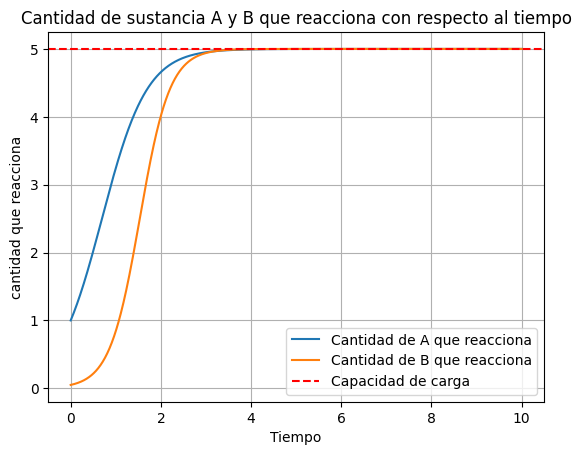

In [ ]:
k1 = 2
k2 = 3
a = 5

def reacciones_quimicas(X, t, k1, k2, a):
    A, B = X
    dAdt = k1 * A * (1 - A/a)
    dBdt = k2 * B * (1 - B/a)
    return [dAdt, dBdt]

condiciones_iniciales = [1, 0.05]
Nt = 1000
tmax = 10
t = np.linspace(0, tmax, Nt)

solucion = odeint(reacciones_quimicas, condiciones_iniciales, t, args=(k1, k2, a))
A, B = solucion.T


plt.plot(t, A, label='Cantidad de A que reacciona')
plt.plot(t, B, label='Cantidad de B que reacciona')
plt.axhline(y = a, color = 'r', linestyle = 'dashed', label = "Capacidad de carga")
plt.xlabel('Tiempo')
plt.ylabel('cantidad que reacciona')
plt.title('Cantidad de sustancia A y B que reacciona con respecto al tiempo')
plt.legend()
plt.grid()
plt.show()

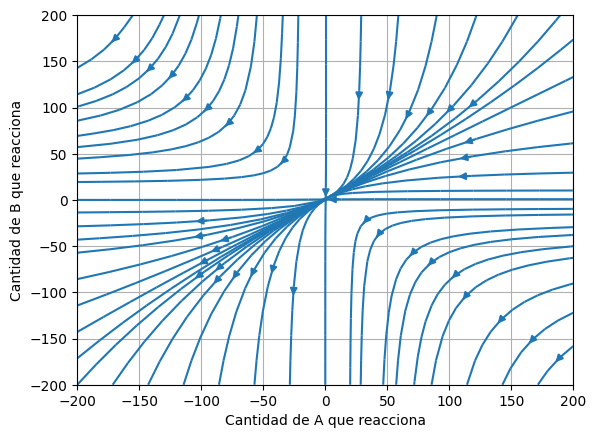

In [ ]:
qui_i = -200
qui_f = 200
W, V = np.mgrid[qui_i:qui_f:100j, qui_i:qui_f:100j]
X, Y = reacciones_quimicas([V, W], t_qui, k1, k2, a)
plt.streamplot(V, W, X, Y, density=[0.5, 0.5], broken_streamlines=False)
plt.xlabel('Cantidad de A que reacciona')
plt.ylabel('Cantidad de B que reacciona')
plt.grid()
plt.show()

# EJERCICIO 16

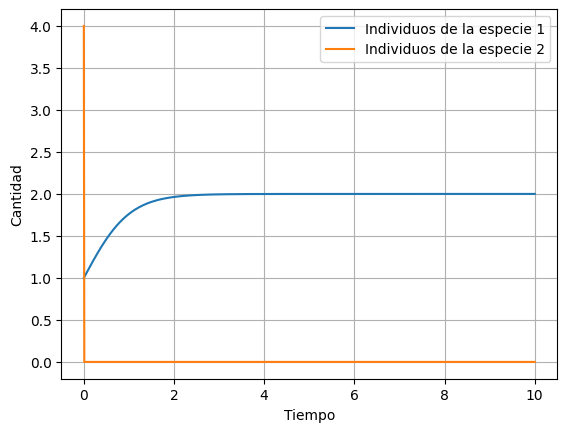

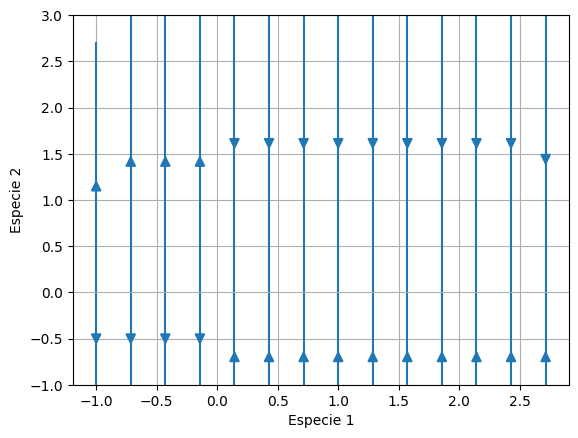

In [ ]:
mu = 10000

def ejercicio_16(X, t, mu):
    x, y = X
    dxdt = x * (2 - x - y)
    dydt = y * (mu - y - (mu ** 2) * x)
    return [dxdt, dydt]

condiciones_iniciales = [1, 4]
Nt = 1000
tmax = 10
t = np.linspace(0, tmax, Nt)

solucion = odeint(ejercicio_16, condiciones_iniciales, t, args=(mu,))
especie1, especie2 = solucion.T

plt.plot(t, especie1, label='Individuos de la especie 1')
plt.plot(t, especie2, label='Individuos de la especie 2')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad')
plt.legend()
plt.grid()
plt.show()

i = -1
f = 3
W, V = np.mgrid[i:f:100j, i:f:100j]
X, Y = ejercicio_16([V, W], t, mu)
plt.streamplot(V, W, X, Y, density=[0.5, 0.5], arrowsize=1.5, broken_streamlines = False)
plt.xlabel('Especie 1')
plt.ylabel('Especie 2')
plt.grid()
plt.show()


Conclusión: No importa el mu que ponga, la especie 2 se extingue sí o sí. Si sacamos el tercer término con mu de la segunda ecuación, la especie dos no tiene limitaciones más que su capacidad de carga y extingue la especie 1. Por lo tanto, este tipo de competencias extinguen a una de las dos especies en ese ambiente.

x
′ = x(1 − y − εx), y′ = y(−1 + x − εy)

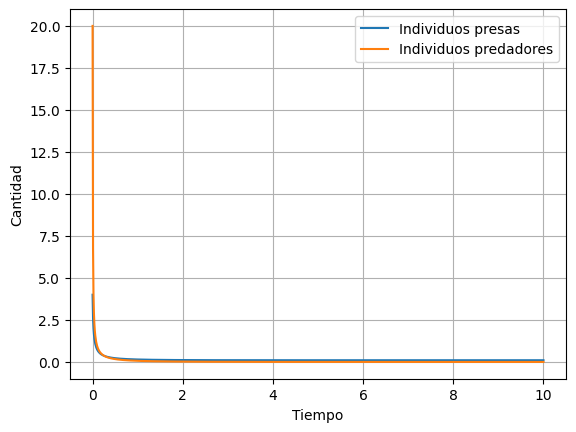

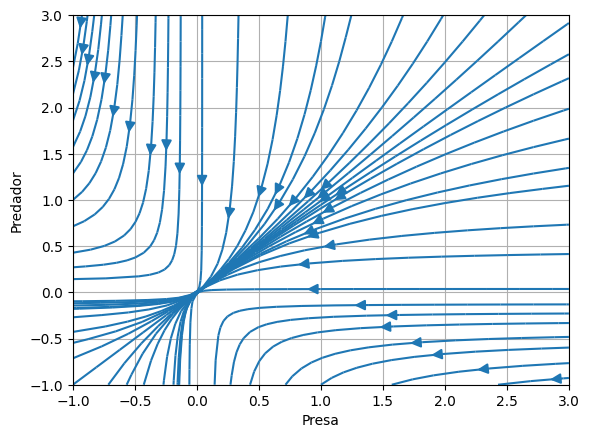

In [ ]:
epsilon = 10

def ejercicio_17(X, t, epsilon):
    x, y = X
    dxdt = x * (1 - y - epsilon * x)
    dydt = y * (-1 + x - epsilon * y)
    return [dxdt, dydt]

condiciones_iniciales = [4,20]
Nt = 1000
tmax = 10
t = np.linspace(0, tmax, Nt)

solucion = odeint(ejercicio_17, condiciones_iniciales, t, args=(epsilon, ))
presa, predador = solucion.T

plt.plot(t, presa, label='Individuos presas')
plt.plot(t, predador, label='Individuos predadores')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad')
plt.legend()
plt.grid()
plt.show()

i = -1
f = 3
W, V = np.mgrid[i:f:100j, i:f:100j]
X, Y = ejercicio_17([V, W], t, mu)
plt.streamplot(V, W, X, Y, density=[0.5, 0.5], arrowsize=1.5, broken_streamlines = False)
plt.xlabel('Presa')
plt.ylabel('Predador')
plt.grid()
plt.show()

# Ejercicio 19

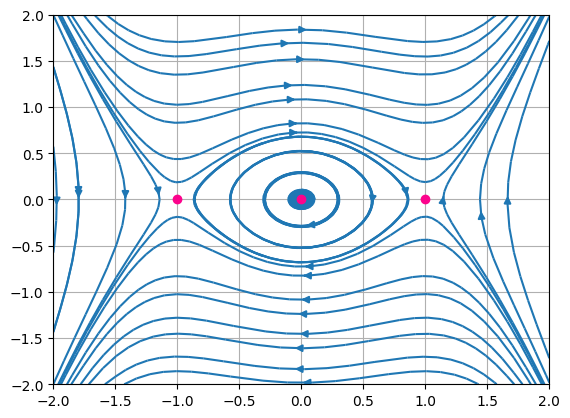

In [ ]:
def hamiltoniano(X, t):
    x, y = X
    dxdt = y
    dydt = -x + x**3
    return [dxdt, dydt]

Nt = 1000
tmax = 10
t = np.linspace(0, tmax, Nt)

i = -2
f = 2
W, V = np.mgrid[i:f:100j, i:f:100j]
X, Y = hamiltoniano([V, W], t)
plt.streamplot(V, W, X, Y, density=[0.5, 0.5], broken_streamlines = False)
plt.plot([1, 0 , -1], [0, 0, 0], marker = 'o', markersize=6, linestyle='', color='#fc038c')
plt.grid()
plt.show()

# Ejercicio 22

In [ ]:
from sympy import symbols, diff, simplify

# Define x e y como símbolos
x, y = symbols('x y')

def estabilidad_Lyapunov(V, x_val, y_val):
    dxdt = (-1/2) * y_val * (1 + x_val) + x_val * (1 - 4*x_val**2 - y_val**2)
    dydt = 2*x_val * (1 + x_val) + y_val * (1 - 4*x_val**2 - y_val**2)
    V_x = V.diff(x)
    V_y = V.diff(y)
    dVdt = V_x * dxdt + V_y * dydt
    return simplify(dVdt < 0)


x_val = [0, 0.25, 0.01, 5, 700, -0.25, -0.01, -5, -700]
y_val = [0, 0.25, 0.01, 5, 700, -0.25, -0.01, -5, -700]

V = (1 - 4*x**2 - y**2)**2

def comprobar_estabilidad(x_val, y_val):
    for x in x_val:
        for y in y_val:
            if not estabilidad_Lyapunov(V, x, y):
                return False
    return True

print(comprobar_estabilidad(x_val, y_val))

(False, 0, 0)
